In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
mask=df.isna().any(axis=0)

In [8]:
mask

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [9]:
mask1=df.isna().any(axis=1)

mask1

In [10]:
mask1

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

<AxesSubplot:>

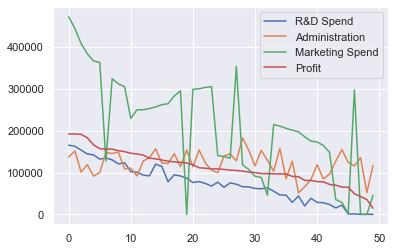

In [11]:
df.plot()

In [12]:
df.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df[df["Profit"]==df["Profit"].max()]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [15]:
df[df["Profit"]==df["Profit"].min()]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


<AxesSubplot:xlabel='State', ylabel='Profit'>

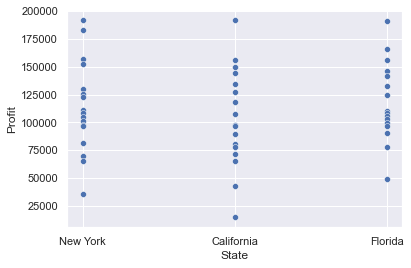

In [16]:
sns.scatterplot(x="State",y="Profit",data=df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

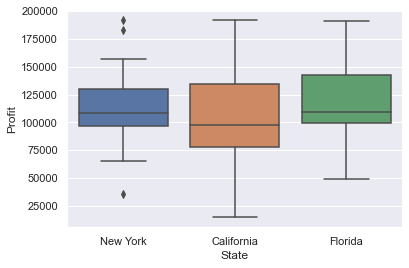

In [17]:
sns.boxplot(x="State",y="Profit",data=df)

<AxesSubplot:xlabel='State', ylabel='Marketing Spend'>

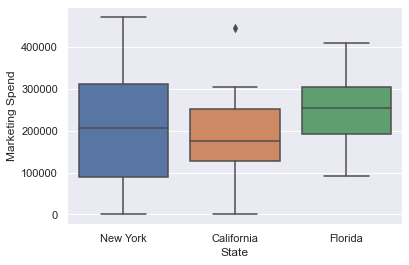

In [18]:
sns.boxplot(x="State",y="Marketing Spend",data=df)

<AxesSubplot:xlabel='State', ylabel='R&D Spend'>

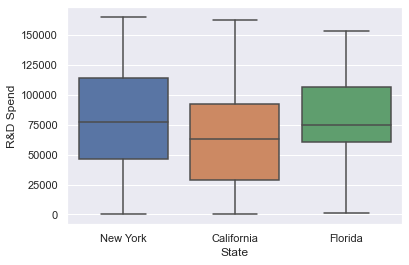

In [19]:
sns.boxplot(x="State",y="R&D Spend",data=df)

In [20]:
df[df["Profit"]>170000]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99


In [21]:
df[df["Profit"]>170000].sum()

R&D Spend                                  625760.82
Administration                             508092.79
Marketing Spend                           1706816.79
State              New YorkCaliforniaFloridaNew York
Profit                                     758006.27
dtype: object

In [22]:
df["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [23]:
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)

R&D Spend
Administration
Marketing Spend


In [24]:
 q1 = df[col_name].quantile(0.25)

In [25]:
q1

129300.1325

In [26]:
 q3 = df[col_name].quantile(0.75)
q3

299469.08499999996

In [27]:
iqr = q3 - q1
iqr

170168.95249999996

In [28]:
low = q1-1.5*iqr
high = q3+1.5*iqr

In [29]:
high

554722.5137499999

In [30]:
low

-125953.29624999993

In [31]:
print("Exclude the Outliers = ",df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name]) 


Exclude the Outliers =  0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19         0.00
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47         0.00
48         0.00
49     45173.06
Name: Marketing Spend, dtype: float64


In [32]:
df[col_name] = df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name]
    

In [33]:
df[col_name]

0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19         0.00
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47         0.00
48         0.00
49     45173.06
Name: Marketing Spend, dtype: float64

In [34]:
 print("Change the outliers with median ",df[col_name].median())
df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

Change the outliers with median  212716.24


In [35]:
df.sample(20)

,R&D Spend,Administration,Marketing Spend,State,Profit
42,23640.93,96189.63,148001.11,California,71498.49
6,134615.46,147198.87,127716.82,California,156122.51
32,63408.86,129219.61,46085.25,California,97427.84
18,91749.16,114175.79,294919.57,Florida,124266.90
38,20229.59,65947.93,185265.10,New York,81229.06
35,46014.02,85047.44,205517.64,New York,96479.51
33,55493.95,103057.49,214634.81,Florida,96778.92
24,77044.01,99281.34,140574.81,New York,108552.04
8,120542.52,148718.95,311613.29,New York,152211.77
36,28663.76,127056.21,201126.82,Florida,90708.19


In [36]:
x=df[["Marketing Spend","R&D Spend"]].values

In [37]:
x

array([[471784.1 , 165349.2 ],
       [443898.53, 162597.7 ],
       [407934.54, 153441.51],
       [383199.62, 144372.41],
       [366168.42, 142107.34],
       [362861.36, 131876.9 ],
       [127716.82, 134615.46],
       [323876.68, 130298.13],
       [311613.29, 120542.52],
       [304981.62, 123334.88],
       [229160.95, 101913.08],
       [249744.55, 100671.96],
       [249839.44,  93863.75],
       [252664.93,  91992.39],
       [256512.92, 119943.24],
       [261776.23, 114523.61],
       [264346.06,  78013.11],
       [282574.31,  94657.16],
       [294919.57,  91749.16],
       [     0.  ,  86419.7 ],
       [298664.47,  76253.86],
       [299737.29,  78389.47],
       [303319.26,  73994.56],
       [304768.73,  67532.53],
       [140574.81,  77044.01],
       [137962.62,  64664.71],
       [134050.07,  75328.87],
       [353183.81,  72107.6 ],
       [118148.2 ,  66051.52],
       [107138.38,  65605.48],
       [ 91131.24,  61994.48],
       [ 88218.23,  61136.38],
       [

In [38]:
y=df["Profit"].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=42)

In [41]:
x_train

array([[127716.82, 134615.46],
       [164470.71,  27892.92],
       [297114.46,   1315.46],
       [     0.  ,      0.  ],
       [261776.23, 114523.61],
       [304981.62, 123334.88],
       [264346.06,  78013.11],
       [140574.81,  77044.01],
       [210797.67,  46426.07],
       [ 88218.23,  61136.38],
       [471784.1 , 165349.2 ],
       [ 28334.72,  22177.74],
       [353183.81,  72107.6 ],
       [214634.81,  55493.95],
       [362861.36, 131876.9 ],
       [107138.38,  65605.48],
       [249744.55, 100671.96],
       [201126.82,  28663.76],
       [443898.53, 162597.7 ],
       [299737.29,  78389.47],
       [407934.54, 153441.51],
       [ 35534.17,  15505.73],
       [205517.64,  46014.02],
       [304768.73,  67532.53],
       [172795.67,  28754.33],
       [229160.95, 101913.08],
       [303319.26,  73994.56],
       [294919.57,  91749.16],
       [ 45173.06,      0.  ],
       [298664.47,  76253.86],
       [323876.68, 130298.13],
       [148001.11,  23640.93],
       [

In [42]:
x_test

array([[252664.93,  91992.39],
       [174999.3 ,  38558.51],
       [ 91131.24,  61994.48],
       [  1903.93,   1000.23],
       [282574.31,  94657.16],
       [     0.  ,    542.05],
       [134050.07,  75328.87],
       [137962.62,  64664.71],
       [ 46085.25,  63408.86],
       [     0.  ,  86419.7 ],
       [249839.44,  93863.75],
       [366168.42, 142107.34],
       [197029.42,  44069.95],
       [311613.29, 120542.52],
       [383199.62, 144372.41]])

In [43]:
y_train

array([156122.51,  77798.83,  49490.75,  42559.73, 129917.04, 149759.96,
       126992.93, 108552.04,  96712.8 ,  97483.56, 192261.83,  65200.33,
       105008.31,  96778.92, 156991.12, 101004.64, 144259.4 ,  90708.19,
       191792.06, 111313.02, 191050.39,  69758.98,  96479.51, 108733.99,
        78239.91, 146121.95, 110352.25, 124266.9 ,  14681.4 , 118474.03,
       155752.6 ,  71498.49, 132602.65, 103282.38,  81229.06])

In [44]:
y_test

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86, 141585.52, 166187.94,
        89949.14, 152211.77, 182901.99])

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
SC=StandardScaler()

In [47]:
x_train_scaled=SC.fit_transform(x_train)

In [48]:
x_test_scaled=SC.fit_transform(x_test)

In [49]:
x_test_scaled

array([[ 0.61156797,  0.40842275],
       [-0.0022299 , -0.8684943 ],
       [-0.66504609, -0.30844158],
       [-1.37021687, -1.76602987],
       [ 0.84794426,  0.47210314],
       [-1.38526378, -1.77697906],
       [-0.32585504,  0.01021224],
       [-0.29493383, -0.24463071],
       [-1.02104826, -0.27464194],
       [-1.38526378,  0.27525138],
       [ 0.58923789,  0.45314291],
       [ 1.5085954 ,  1.60602685],
       [ 0.17187595, -0.73678663],
       [ 1.07744171,  1.09068928],
       [ 1.64319437,  1.66015555]])

In [50]:
x_test_scaled

array([[ 0.61156797,  0.40842275],
       [-0.0022299 , -0.8684943 ],
       [-0.66504609, -0.30844158],
       [-1.37021687, -1.76602987],
       [ 0.84794426,  0.47210314],
       [-1.38526378, -1.77697906],
       [-0.32585504,  0.01021224],
       [-0.29493383, -0.24463071],
       [-1.02104826, -0.27464194],
       [-1.38526378,  0.27525138],
       [ 0.58923789,  0.45314291],
       [ 1.5085954 ,  1.60602685],
       [ 0.17187595, -0.73678663],
       [ 1.07744171,  1.09068928],
       [ 1.64319437,  1.66015555]])

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
LR=LinearRegression()

In [53]:
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [54]:
LR.intercept_

111235.21314285714

In [55]:
LR.coef_

array([ 4483.09293462, 36450.27863188])

In [56]:
y_predict=LR.predict(x_train_scaled)

In [57]:
y_predict

array([155131.41438264,  73595.85469231,  58092.55415544,  45517.06073621,
       144724.98667   , 153254.73071927, 116442.13403283, 110876.09993561,
        89804.6366742 ,  96473.90908087, 192401.98065932,  63859.49587212,
       115305.5984448 ,  97003.08762993, 162145.75458723, 100683.81101282,
       133489.0635704 ,  75620.41604395, 189178.71053042, 118110.8488262 ,
       180662.40178173,  58952.70444239,  89279.0080465 , 109866.44852904,
        74589.2075672 , 133653.52979174, 114833.58407848, 128309.16386407,
        47273.55079244, 116408.93895645, 159402.5760799 ,  69650.01732919,
       148733.47859901, 101458.65773208,  68447.04415319])

In [58]:
LR.score(x_train_scaled,y_train)

0.948266013868345

In [59]:
LR.score(x_test_scaled,y_test)

0.9479768860237261

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
y_predict.shape

(35,)

In [62]:
y_test.shape

(15,)

In [63]:
x_train_scaled=x_train_scaled.reshape(-1,1)

In [64]:
x_test=x_test.reshape(-1,1)

In [65]:
y_test=y_test.reshape(-1,1)

In [66]:
y_train=y_train.reshape(-1,1)

In [67]:
y_predict=LR.predict(x_test_scaled)

In [68]:
y_predict

array([128864.05220403,  79568.35713763,  97010.96812357,  40720.12278772,
       132244.9170016 ,  40253.56493929, 110146.61359348, 100996.13963115,
        96646.98362843, 115057.93644314, 130394.00655103, 176538.51282263,
        85149.6710288 , 155821.41248633, 179114.93876404])

In [69]:
mse=mean_squared_error(y_predict,y_test)

In [70]:
mse

73196572.74944912

In [71]:
rmse=np.sqrt(mse)

In [72]:
rmse

8555.49956165326

In [73]:
y_predict.shape

(15,)

In [74]:
x_test_scaled.shape

(15, 2)

In [75]:
y_test.shape

(15, 1)

In [76]:
df.to_csv("50_startups_new.csv")